# essais article 2 & 3 avec le corps du mobile net modifié (+ la t^te value modifiée)

In [1]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers 
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, Dense 
from tensorflow.keras.layers import Concatenate, Add, ReLU, BatchNormalization
from tensorflow.keras.layers import AvgPool2D, MaxPool2D, GlobalAveragePooling2D, Reshape,ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Permute, Lambda, Flatten, Activation
from tensorflow.keras import regularizers

import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 3.4 MB/s eta 0:00:00


In [4]:
!wget https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
!unzip project2022.zip

--2023-06-07 12:22:08--  https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138884468 (132M) [application/zip]
Saving to: ‘project2022.zip’

project2022.zip     100%[===================>] 132.45M  24.8MB/s    in 6.0s    

2023-06-07 12:22:15 (21.9 MB/s) - ‘project2022.zip’ saved [138884468/138884468]

Archive:  project2022.zip
  inflating: Board.h                 
  inflating: Game.h                  
  inflating: Rzone.h                 
  inflating: compile.sh              
  inflating: compileMAC.sh           
  inflating: games.data              
  inflating: golois.cpp              
  inflating: golois.cpython-310-x86_64-linux-gnu.so  
  inflating: golois.cpython-37m-x86_64-linux-gnu.so  
  inflating: golois.cpython-38-x86_64-linux-gnu.so  
  inflat

In [5]:
!c++ -O3 -Wall -shared -std=c++11 -fsized-deallocation -fPIC `python3.10 -m pybind11 --includes` golois.cpp -o golois$(python3.10-config --extension-suffix)

In file included from golois.cpp:17:
Board.h: In member function ‘bool Board::isCapturedLadder(int, int, Rzone*)’:
Board.h:1767:8: warning: unused variable ‘n1’ [-Wunused-variable]
 1767 |    int n1 = nbLiberties (inter, liberties1, stones1, 3);
      |        ^~
Board.h:1788:12: warning: unused variable ‘n1’ [-Wunused-variable]
 1788 |        int n1 = nbLiberties (inter, liberties1, stones1, 3);
      |            ^~
Board.h: In member function ‘void Board::computeLadders(int)’:
Board.h:1819:9: warning: unused variable ‘other’ [-Wunused-variable]
 1819 |     int other = opponent (color);
      |         ^~~~~
Board.h: In member function ‘void Board::computeAllLadders(int, bool)’:
Board.h:2065:9: warning: unused variable ‘n1’ [-Wunused-variable]
 2065 |     int n1 = nbLiberties (i, liberties1, stones1);
      |         ^~
Board.h:2101:7: warning: unused variable ‘n1’ [-Wunused-variable]
 2101 |   int n1 = nbLiberties (i, liberties1, stones1);
      |       ^~
Board.h:2134:9: warning: u

In [6]:
import gc
import golois

In [28]:
planes = 31
moves = 361
N = 30000 
epochs = 100
batch = 1024
filters = 48 

In [8]:
#artcile sur Squeeze and Excitation
def SE_block(t,filters,ratio=16):
  se_shape = (1,1,filters)
  se = GlobalAveragePooling2D()(t)
  se = Reshape(se_shape)(se)
  se = layers.Dense(filters//ratio,activation='relu',use_bias = False)(se)
  se = layers.Dense(filters,activation='sigmoid',use_bias = False)(se)
  x = layers.Multiply()([t,se])
  return x
    

def SE Block(t , filters , ratio =16): se shape = (1, 1, filters )
se = se = se =
se =
GlobalAveragePooling2D ()( t ) Reshape(se shape)(se) Dense( filters // ratio ,
activation=’relu’,
use bias=False)(se) Dense( filters ,
activation=’sigmoid ’ ,
use bias=False)(se) x = multiply([t,se])
return x

In [ ]:
#ratio = 16 

#input = keras.Input(shape=(19, 19, planes), name='board')
#x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)

#output=SE_block(x,filters)

#Ind=x
#se_shape = (1,1,filters)
#se = GlobalAveragePooling2D()(x)
#se = Reshape(se_shape)(se)
#se = layers.Dense(filters//ratio,activation='relu',use_bias = False)(se)
#se = layers.Dense(filters,activation='sigmoid',use_bias = False)(se)
#x = layers.Multiply()([Ind,se])


#model = keras.Model(inputs=input, outputs=output)

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
#block res net de référence (mobile net)
def bottleneck_block(x, expand=6*filters, squeeze=filters):
  m = layers.Conv2D(expand, (1,1), use_bias = False)(x)
  m = layers.BatchNormalization()(m)
  m = layers.Activation('relu')(m)
  m = layers.DepthwiseConv2D((3,3), padding='same', use_bias = False)(m) 
  m = layers.BatchNormalization()(m)
  m = layers.Activation('relu')(m)
  m = layers.Conv2D(squeeze, (1,1), use_bias = False)(m)
  m = layers.BatchNormalization()(m)

  return layers.Add()([m, x]) #ici on rajoute l'entrée du bloc à l'entrée du bloc


In [9]:
#block res net de référence (mobile net)
def bottleneck_block_bis(x, expand=6*filters, squeeze=filters):
  m = layers.Conv2D(expand, (1,1), use_bias = False)(x)
  m = layers.BatchNormalization()(m)
  m = layers.Activation('relu')(m)
  m = layers.DepthwiseConv2D((3,3), padding='same', use_bias = False)(m) 
  m = layers.BatchNormalization()(m)
  m = layers.Activation('relu')(m)
  m = layers.Conv2D(squeeze, (1,1), use_bias = False)(m)
  m = layers.BatchNormalization()(m)

  m=SE_block(m,filters)
  
  return layers.Add()([m, x]) #ici on rajoute l'entrée du bloc à l'entrée du bloc


In [29]:
#ne PAS OUBLIER  de rejouer qd N change ou changement de moèdle !!
input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)


getValidation


In [30]:
#partie pour appeler les différentes architectures de Residual Network

#couche d'input
input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)

In [31]:
#couches cachées différents modèles de RN
for i in range (3):
  x = bottleneck_block_bis(x)

In [ ]:
#non utilisé dans cette version

#Call back qui monitore une valeur par exemple value_loss  et réduit le LR si pas d'amélioration constatée
#min_lr = lower bound on the learning rate
#In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing
#patience: number of epochs with no improvement after which learning rate will be reduced.

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='value_mse', mode='min',factor=0.2,
                              patience=5, min_delta=0.005,verbose=1) 

In [ ]:
#non utilisé $ tensorBoard 
tensorboard =tf.keras.callbacks.TensorBoard(log_dir="/content/drive/MyDrive/colab_slim",histogram_freq=1)

In [ ]:
#%cd /content/drive/MyDrive/colab_slim
%ls -la

In [13]:
#enregistrement des ttes epochs dans un fichier log
csv_logger = tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/colab_slim/training_article2&3_v2.log',append=True)

In [32]:
#couches de sortie policy
policy_head = layers.Conv2D(1, 1, activation='relu', padding='same')(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Activation('softmax', name='policy')(policy_head)

#value_head=ZeroPadding2D(padding=(1,1))(x)
value_head=AvgPool2D(pool_size=(2,2),strides=2,padding='same')(x)
value_head=ZeroPadding2D(padding=(1,1))(value_head)
value_head=AvgPool2D(pool_size=(2,2),strides=2,padding='same')(value_head)
value_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False)(value_head)
value_head = layers.Flatten()(value_head)

value_head = layers.Dense(50, activation='relu')(value_head)
value_head = layers.Dense(9, activation='relu')(value_head)
value_head = layers.Dense(1, activation='sigmoid', name='value')(value_head)


model = keras.Model(inputs=input, outputs=[policy_head, value_head])

model.summary ()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 19, 19, 48)   1536        ['board[0][0]']                  
                                                                                                  
 conv2d_19 (Conv2D)             (None, 19, 19, 288)  13824       ['conv2d_18[0][0]']              
                                                                                                  
 batch_normalization_18 (BatchN  (None, 19, 19, 288)  1152       ['conv2d_19[0][0]']        

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [34]:
model = keras.models.load_model('/content/drive/MyDrive/colab_slim/SlimSEM23_Variante_Residual_GO_Article2&3_v02__500Epochs.h5')

In [35]:
#compile initial
#model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
#              loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
#              loss_weights={'policy' : 1.0, 'value' : 1.0},
#              metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

opt = keras.optimizers.Adam(learning_rate=0.0008)
model.compile(optimizer=opt,
              loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
              loss_weights={'policy' : 1.0, 'value' : 9.0},
              metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

for i in range (1, epochs + 1):
    print ('epoch ' + str (i))
    golois.getBatch (input_data, policy, value, end, groups, i * N)
    history = model.fit(input_data,
                        {'policy': policy, 'value': value},validation_split=0.2,
                        epochs=1, batch_size=batch,verbose=1,callbacks=[csv_logger])
    
    if (i % 2 == 0):
        gc.collect () #garbage collector
    if (i % 100 == 0):
        golois.getValidation (input_data, policy, value, end)
        val = model.evaluate (input_data,
                              [policy, value], verbose = 1, batch_size=batch)
        print ("val =", val)
        model.save ('/content/drive/MyDrive/colab_slim/SlimSEM23_Variante_Residual_GO_Article2&3_v02__{}Epochs.h5'.format(i+500))



epoch 1
24/24 [==============================] - 19s 496ms/step - loss: 7.6092 - policy_loss: 2.3040 - value_loss: 0.5895 - policy_categorical_accuracy: 0.4108 - value_mse: 0.0758 - val_loss: 7.6322 - val_policy_loss: 2.3014 - val_value_loss: 0.5923 - val_policy_categorical_accuracy: 0.4048 - val_value_mse: 0.0794
epoch 2
24/24 [==============================] - 11s 460ms/step - loss: 7.6358 - policy_loss: 2.2979 - value_loss: 0.5931 - policy_categorical_accuracy: 0.4101 - value_mse: 0.0777 - val_loss: 7.6632 - val_policy_loss: 2.3304 - val_value_loss: 0.5925 - val_policy_categorical_accuracy: 0.3985 - val_value_mse: 0.0777
epoch 3
24/24 [==============================] - 11s 469ms/step - loss: 7.6078 - policy_loss: 2.2910 - value_loss: 0.5908 - policy_categorical_accuracy: 0.4153 - value_mse: 0.0770 - val_loss: 7.7226 - val_policy_loss: 2.3048 - val_value_loss: 0.6020 - val_policy_categorical_accuracy: 0.4027 - val_value_mse: 0.0823
epoch 4
24/24 [==============================] - 11s

In [ ]:
#essai 1 avec modif du corps princiaple article 3 et  tetes suivant article 2 sur average pooling 2D
#avec  98,3 K paramètres (6 boucles de Mobile Net modifiée + new têtes value et policy
#new optimizer ADAM(learning_rate=0.01 pas de momentum mais adaptatif
#loss_weights={'policy' : 1.0, 'value' : 9.0} ?
#pas de régul
#N=30K 
#Batch size=1024
#epoch =600


#les 100 premières epcohs LR = 0,01
#les epochs de 101 à 200, LR= 0,008
#les epochs de 201 à 300, LR= 0,006
#les epochs de 301 à 400, LR= 0,004
#les epochs de 401 à 500, LR= 0,001
#les epochs de 501 à 600, LR= 0,0008


#val à epochs =100 = [8.124777793884277, 2.5031914710998535, 0.6246204376220703, 0.38690000772476196, 0.08942416310310364]
#val à epochs =200 = [7.677131175994873, 2.283867120742798, 0.5992516279220581, 0.4053666591644287, 0.0800807997584343]
#val à epochs =300 = [7.406951904296875, 2.206000328063965, 0.5778834819793701, 0.4192666709423065, 0.07156974077224731]
#val à epochs =400 = [7.402581691741943, 2.1690433025360107, 0.5815041661262512, 0.4248333275318146, 0.07307418435811996]
#val à epcohs = 500 = [7.207860469818115, 2.129920482635498, 0.5642154812812805, 0.430400013923645, 0.06710759550333023
#val à epcohs = 600 = 7.176981449127197, 2.126734733581543, 0.561138391494751, 0.43076667189598083, 0.06598347425460815]
    

#intéressant à partir de 600 epochs les accuracy et mse ne bougent plus qu'au delà de e-3 pour accuracy et e-4 pour mse

#pour rappel le meilleur résultat obtenu article 2 / 400 epochs / LR variable et batch szie à 256 + N =30K
#val à epochs =400 = [7.779914379119873, 2.2341439723968506, 0.6161968111991882, 0.41856667399406433, 0.08675386756658554


In [ ]:
#essai 2 avec modif du corps princiaple article 3 et  tetes suivant article 2 sur average pooling 2D
#mais 48 plans et moins de profondeur
#avec  103K paramètres (3 boucles de Mobile Net modifiée + new têtes value et policy
#new optimizer ADAM(learning_rate=0.01 pas de momentum mais adaptatif
#loss_weights={'policy' : 1.0, 'value' : 9.0} 
#pas de régul
#N=30K 
#Batch size=1024
#epoch =600


#les 100 premières epcohs LR = 0,01
#les epochs de 101 à 200, LR= 0,008
#les epochs de 201 à 300, LR= 0,006
#les epochs de 301 à 400, LR= 0,001
#les epochs de 401 à 500, LR= 0,001
#les epochs de 501 à 600, LR= 0,0008


#val à epochs =100 = [[8.64240837097168, 2.5023820400238037, 0.6822251081466675, 0.3799999952316284, 0.11016304045915604]
#val à epochs =200 =[8.111641883850098, 2.431976795196533, 0.6310738921165466, 0.3939000070095062, 0.09252747893333435]
#val à epochs =300 = [[8.099239349365234, 2.3834409713745117, 0.6350889205932617, 0.4007333219051361, 0.09343153238296509]
#val à epochs =400 = [[7.692575454711914, 2.3111801147460938, 0.5979329347610474, 0.41119998693466187, 0.079777292907238]
#val à epcohs = 500 =[7.691886901855469, 2.3049991130828857, 0.598543107509613, 0.41260001063346863, 0.07991258800029755]
#val à epcohs = 600 =[7.647947788238525, 2.3023884296417236, 0.5939509868621826, 0.4140999913215637, 0.07833689451217651]
    

#commentaiees

#pour rappel le meilleur résultat obtenu article 2 / 400 epochs / LR variable et batch szie à 256 + N =30K
#val à epochs =400 = [7.779914379119873, 2.2341439723968506, 0.6161968111991882, 0.41856667399406433, 0.08675386756658554

#pour rappel le meilleur résultat obtenu article 2 / 400 epochs / LR variable et batch szie à 256 + N =30K
#val à epochs =400 = 7.402581691741943, 2.1690433025360107, 0.5815041661262512, 0.4248333275318146, 0.07307418435811996]
#val à 600 epochs = 7.176981449127197, 2.126734733581543, 0.561138391494751, 0.43076667189598083, 0.06598347425460815]


In [37]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/colab_slim/training_article2&3_v2.log')

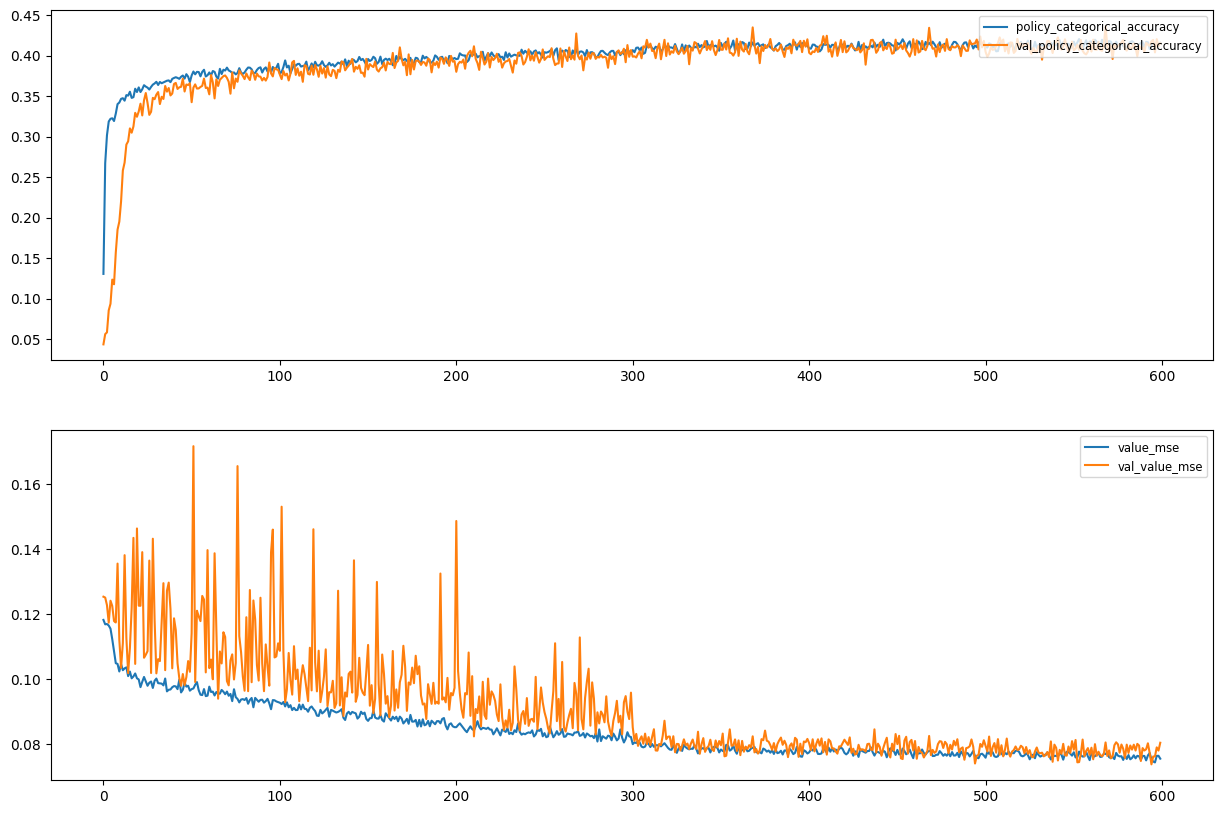

In [38]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
# legend([plot1], "title", prop=fontP) 

#plt.plot(metrics_df.iloc[:, metrics_df.columns.get_level_values(1)=='val_loss'])
fig, ax = plt.subplots(2, figsize = (15,10))
df.loc[:,'policy_categorical_accuracy'].plot(ax=ax[0])
df.loc[:,'val_policy_categorical_accuracy'].plot(ax=ax[0])
df.loc[:,'value_mse'].plot(ax=ax[1])
df.loc[:,'val_value_mse'].plot(ax=ax[1])

ax[0].legend(prop=fontP, loc='upper right')
ax[1].legend(prop=fontP, loc='upper right')

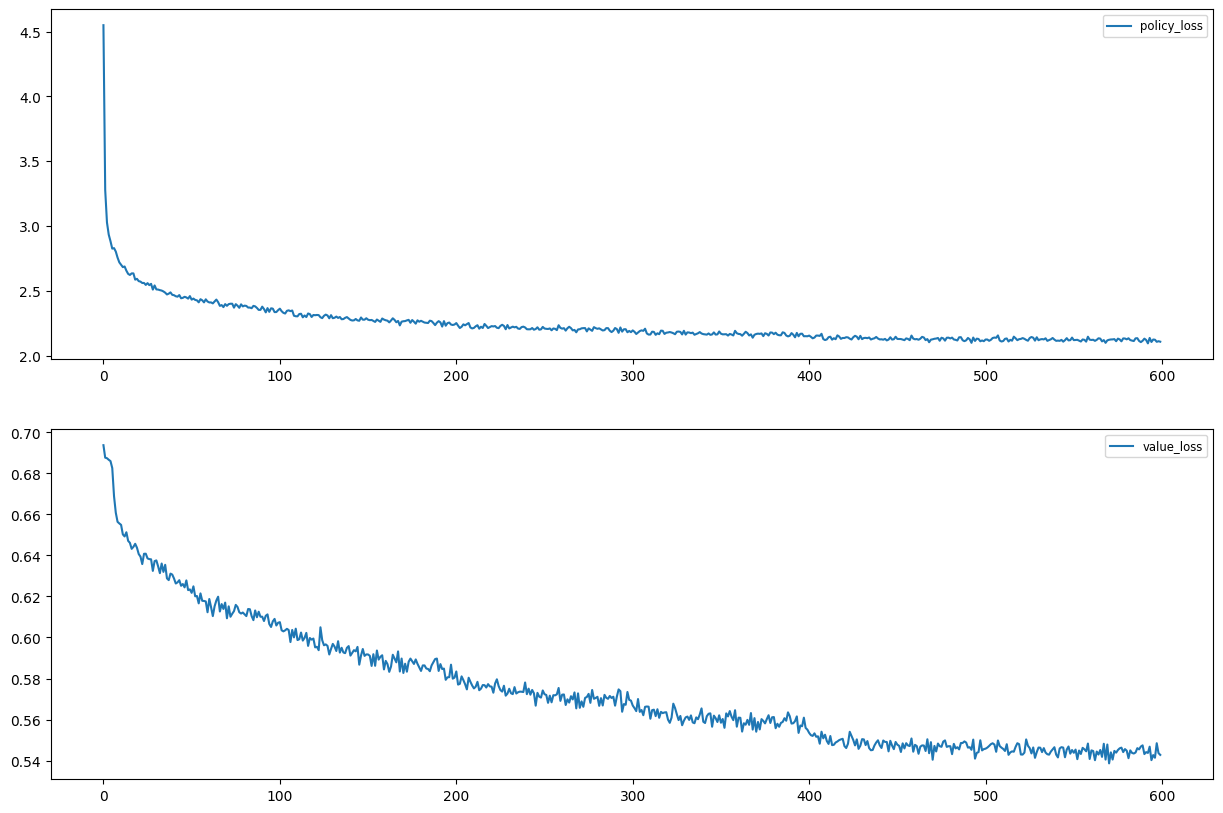

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
# legend([plot1], "title", prop=fontP) 

#plt.plot(metrics_df.iloc[:, metrics_df.columns.get_level_values(1)=='val_loss'])
fig, ax = plt.subplots(2, figsize = (15,10))
df.loc[:,'policy_loss'].plot(ax=ax[0])
df.loc[:,'value_loss'].plot(ax=ax[1])
ax[0].legend(prop=fontP, loc='upper right')
ax[1].legend(prop=fontP, loc='upper right')

#1ier ref  avec epoch à 200 _ loss weight 1 pour policy et 1 pour value

quels sont les hyperparamètres à suivre ?
- suivre la loss de value et constater qu'elle evolue pas //donc ne pas hésiter à uagmenter son poids par rapport à la loss de la policy
- le LR est aussi très important
- changer l'optimiseur essayer ADAM
- nbre de filter à 33
- nbre epoch à 200

- notes de sara

actions sur le modèle
- pas beaucoup de couches dans le model
- probablement pas de dropout
- utiliser mobil-net 

action sur le compile:
- learning rate: 
- vérifier l'utilisation de 'decay'  L2 regularization
- et CosignAnnealing
- poid de la loss 'value'
- Adam comme optimiser 

Meilleur score d'accurancy: 0.47